<a href="https://colab.research.google.com/github/gautamHCSCV/AI-ML/blob/main/Image_Sharpening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/datasetsp.zip

Streaming output truncated to the last 5000 lines.
  inflating: unlabeled_images/unlabeled_image_png_95499.png  
  inflating: unlabeled_images/unlabeled_image_png_955.png  
  inflating: unlabeled_images/unlabeled_image_png_9550.png  
  inflating: unlabeled_images/unlabeled_image_png_95500.png  
  inflating: unlabeled_images/unlabeled_image_png_95501.png  
  inflating: unlabeled_images/unlabeled_image_png_95502.png  
  inflating: unlabeled_images/unlabeled_image_png_95503.png  
  inflating: unlabeled_images/unlabeled_image_png_95504.png  
  inflating: unlabeled_images/unlabeled_image_png_95505.png  
  inflating: unlabeled_images/unlabeled_image_png_95506.png  
  inflating: unlabeled_images/unlabeled_image_png_95507.png  
  inflating: unlabeled_images/unlabeled_image_png_95508.png  
  inflating: unlabeled_images/unlabeled_image_png_95509.png  
  inflating: unlabeled_images/unlabeled_image_png_9551.png  
  inflating: unlabeled_images/unlabeled_image_png_95510.png  
  inflating: unlabeled_

In [ ]:
import cv2
import os
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [ ]:
def read_images(file_path):
  x=[cv2.imread(file) for file in glob.glob(file_path+'/*.png')]
  return x

START

In [ ]:
y=read_images('/content/train_images')

In [ ]:
def add_noise(X):
    result = []
    for img in X:
        noisy = cv2.GaussianBlur(img, (9, 9), 0)
        result.append(noisy)
    return result


In [ ]:
i=0
for m in y:
   y[i]= cv2.resize(m, (128,128))
   i=i+1

In [ ]:
import numpy as np
a9 = np.random.randint(4, size=(5000,128,128,3))

In [ ]:
for c in range(5000):
  a9[c]=y[c]

In [ ]:
a9=a9/255.0

In [ ]:
noise_train=add_noise(y)

In [ ]:
a10 = np.random.randint(4, size=(5000,128,128,3))

In [ ]:
for c in range(5000):
  a10[c]=noise_train[c]

In [ ]:
a10=a10/255.0

In [ ]:
x_train=a10[:3500,:,:,:]
y_train=a9[:3500,:,:,:]
x_test=a10[3500:3750,:,:,:]
y_test=a9[3500:3750,:,:,:]
x_val=a10[3750:5000,:,:,:]
y_val=a9[3750:5000,:,:,:]

In [ ]:
from keras import models, layers
model = models.Sequential()

#encode

model.add(layers.Conv2D(256, (3, 3), strides = 1, padding = 'same',activation='relu', input_shape = (128,128,3)))
model.add(layers.Conv2D(128, (3, 3), strides = 1, padding = 'same',activation='relu'))
model.add(layers.Conv2D(64, (3, 3), strides = 1, padding = 'same',activation='relu'))


model.add(layers.Conv2D(8, (3, 3), strides = 1, padding = 'same'))

#decode
model.add(layers.Conv2DTranspose(64, (3, 3), strides = 1, padding = 'same',activation='relu'))
model.add(layers.Conv2DTranspose(128, (3, 3), strides = 1, padding = 'same',activation='relu'))
model.add(layers.Conv2DTranspose(256, (3, 3), strides = 1, padding = 'same',activation='relu'))
model.add(layers.Conv2DTranspose(3, (3, 3), strides = 1, activation = 'sigmoid', padding = 'same'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 256)     7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     295040    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      73792     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 8)       4616      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 128, 128, 64)      4672      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 128, 128, 256)     2

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
model.compile(loss = 'mse', optimizer = 'adam',metrics=['acc','mse'])
stop = EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
import tensorflow as tf
with tf.device('/device:GPU:0'):
    h=model.fit(x_train,y_train,epochs = 10, batch_size = 32,validation_data = (x_val,y_val),callbacks=[stop])

Epoch 1/10
110/110 [==============================] - 141s 947ms/step - loss: 0.0140 - acc: 0.5751 - mse: 0.0140 - val_loss: 0.0032 - val_acc: 0.7239 - val_mse: 0.0032
Epoch 2/10
110/110 [==============================] - 98s 892ms/step - loss: 0.0023 - acc: 0.7637 - mse: 0.0023 - val_loss: 0.0014 - val_acc: 0.8346 - val_mse: 0.0014
Epoch 3/10
110/110 [==============================] - 98s 891ms/step - loss: 0.0014 - acc: 0.8257 - mse: 0.0014 - val_loss: 0.0020 - val_acc: 0.7847 - val_mse: 0.0020
Epoch 4/10
110/110 [==============================] - 98s 891ms/step - loss: 0.0011 - acc: 0.8173 - mse: 0.0011 - val_loss: 0.0010 - val_acc: 0.7837 - val_mse: 0.0010
Epoch 5/10
110/110 [==============================] - 98s 892ms/step - loss: 0.0011 - acc: 0.8106 - mse: 0.0011 - val_loss: 8.5818e-04 - val_acc: 0.7929 - val_mse: 8.5818e-04
Epoch 6/10
110/110 [==============================] - 98s 891ms/step - loss: 7.5724e-04 - acc: 0.8379 - mse: 7.5724e-04 - val_loss: 6.3766e-04 - val_acc: 0.

In [ ]:
x_test1=x_test[:10,:,:,:]

In [ ]:
y_test1=y_test[:10,:,:,:]

In [ ]:
preds = model.predict(x_test1)

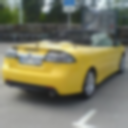

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(x_test1[0]*255)

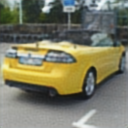

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(preds[0]*255)

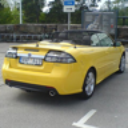

In [ ]:
cv2_imshow(y_test1[0]*255)

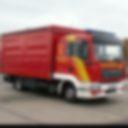

In [ ]:
cv2_imshow(x_test1[1]*255)

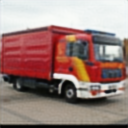

In [ ]:
cv2_imshow(preds[1]*255)

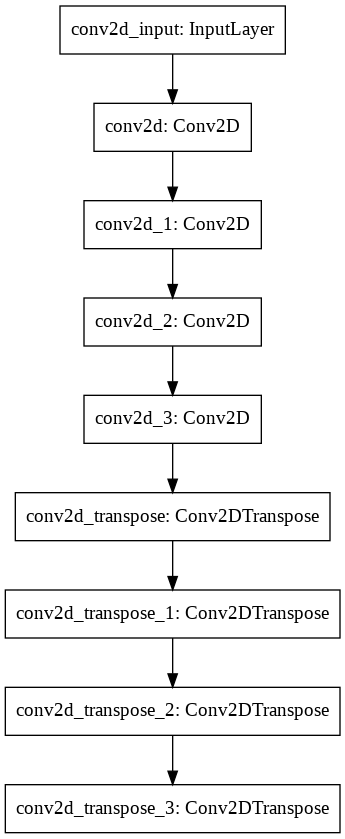

In [ ]:
from tensorflow import keras
keras.utils.plot_model(model)

Text(0, 0.5, 'Loss')

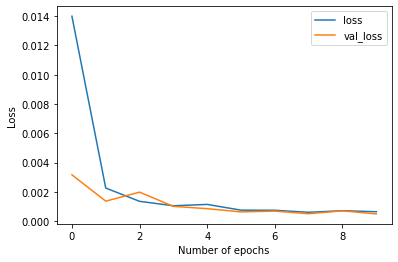

In [ ]:
loss = pd.DataFrame(h.history)
loss[['loss','val_loss']].plot()
plt.xlabel("Number of epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

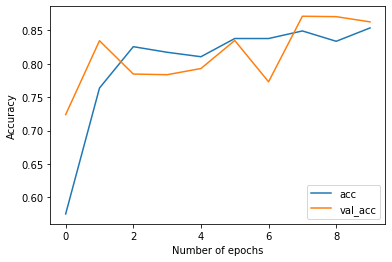

In [ ]:
loss[['acc','val_acc']].plot()
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")

In [ ]:
print(model.metrics_names)
print(model.evaluate(x_test1,y_test1,verbose=0))

['loss', 'acc', 'mse']
[0.0005172619130462408, 0.8371032476425171, 0.0005172619130462408]


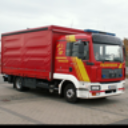

In [ ]:
cv2_imshow(y_test1[1]*255)

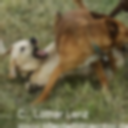

In [ ]:
cv2_imshow(x_test1[2]*255)

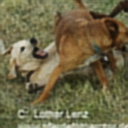

In [ ]:
cv2_imshow(preds[2]*255)

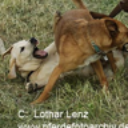

In [ ]:
cv2_imshow(y_test1[2]*255)

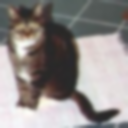

In [ ]:
cv2_imshow(x_test1[3]*255)

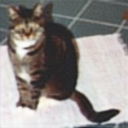

In [ ]:
cv2_imshow(preds[3]*255)

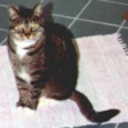

In [ ]:
cv2_imshow(y_test1[3]*255)

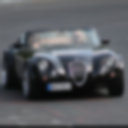

In [ ]:
cv2_imshow(x_test1[4]*255)

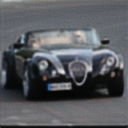

In [ ]:
cv2_imshow(preds[4]*255)

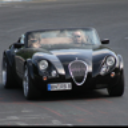

In [ ]:
cv2_imshow(y_test1[4]*255)

In [ ]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [ ]:
mse(preds[0],y_test1[0])

0.0017092299418858703

In [ ]:
from skimage.metrics import structural_similarity as ssim
ssim(preds[0],y_test1[0],multichannel=True)

/usr/local/lib/python3.7/dist-packages/skimage/metrics/_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)


0.9732625081550443

In [ ]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [ ]:
PSNR(y_test1[0],preds[0])

80.57401123507758